Image Classification of Custom-Images using Deep-Learning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import os

In [ ]:
ntw=cv2.imread('/content/drive/MyDrive/Milling_Tool_3_Classes/Train/No_Tool_Wear/0001.jpg')25265

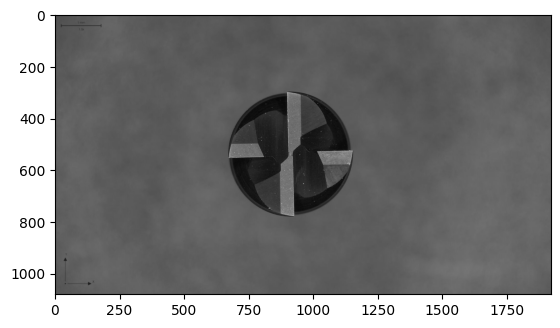

In [ ]:
plt.imshow(ntw)

In [ ]:
stw = cv2.imread('/content/drive/MyDrive/Milling_Tool_3_Classes/Train/Sever_Tool_Wear/0005.jpg')

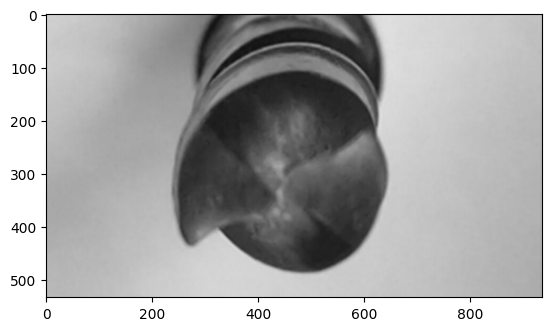

In [ ]:
plt.imshow(stw)

In [ ]:
mtw=cv2.imread('/content/drive/MyDrive/Milling_Tool_3_Classes/Train/Mild_Tool_Wear/0001.jpg')


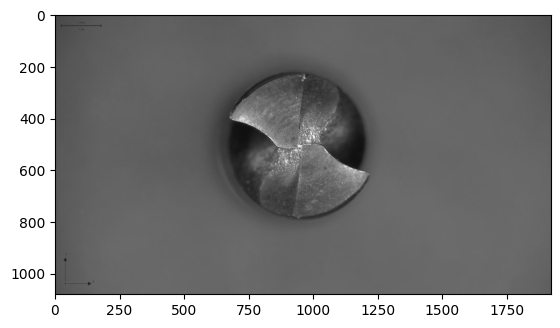

In [ ]:
plt.imshow(mtw)

In [ ]:
ntw_rgb=cv2.cvtColor(ntw,cv2.COLOR_BGR2RGB)
mtw_rgb=cv2.cvtColor(mtw,cv2.COLOR_BGR2RGB)
stw_rgb = cv2.cvtColor(stw,cv2.COLOR_BGR2RGB)

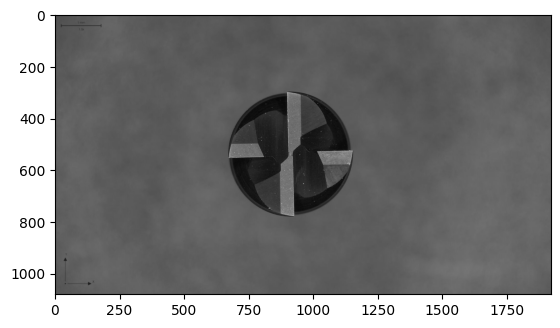

In [ ]:
plt.imshow(ntw_rgb)

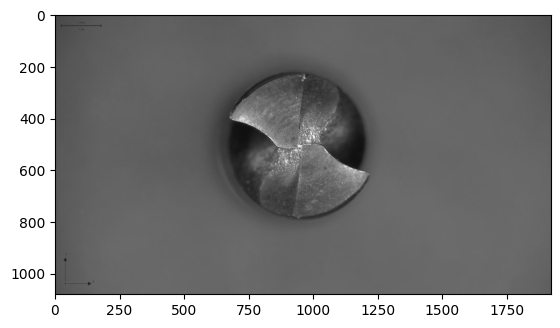

In [ ]:
plt.imshow(mtw_rgb)

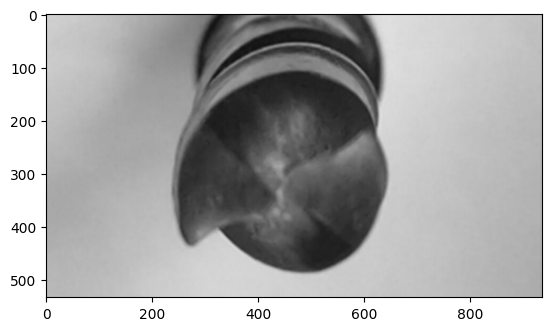

In [ ]:
plt.imshow(stw_rgb)

In [ ]:
folder_path1='/content/drive/MyDrive/Milling_Tool_3_Classes/Train/No_Tool_Wear'
folder_path2='/content/drive/MyDrive/Milling_Tool_3_Classes/Test/No_Tool_Wear'
folder_path3='/content/drive/MyDrive/Milling_Tool_3_Classes/Train/Mild_Tool_Wear'
folder_path4='/content/drive/MyDrive/Milling_Tool_3_Classes/Test/Mild_Tool_Wear'
folder_path5 = '/content/drive/MyDrive/Milling_Tool_3_Classes/Train/Sever_Tool_Wear'
folder_path6 = '/content/drive/MyDrive/Milling_Tool_3_Classes/Test/Sever_Tool_Wear'

In [ ]:
ntw_train_img=glob.glob(os.path.join(folder_path1,'*.jpg'))
mtw_train_img=glob.glob(os.path.join(folder_path2,'*.jpg'))
ntw_test_img=glob.glob(os.path.join(folder_path3,'*.jpg'))
mtw_test_img=glob.glob(os.path.join(folder_path4,'*.jpg'))
stw_train_img=glob.glob(os.path.join(folder_path5,'*.jpg'))
ntw_test_img=glob.glob(os.path.join(folder_path1,'*.jpg'))

In [ ]:
len(ntw_train_img)

1438

In [ ]:
len(mtw_train_img)

602

In [ ]:
len(ntw_test_img)

1438

In [ ]:
len(mtw_test_img)

588

In [ ]:
len(stw_train_img)

1006

In [ ]:
len(stw_test_img)

471

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

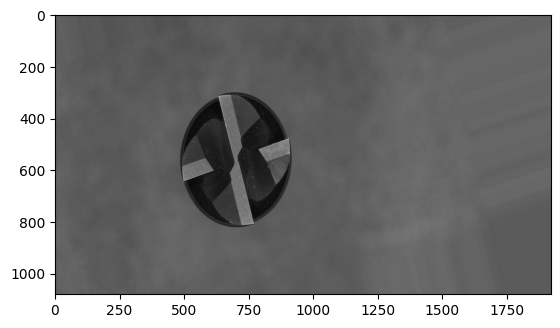

In [ ]:
plt.imshow(image_gen.random_transform(ntw_rgb))

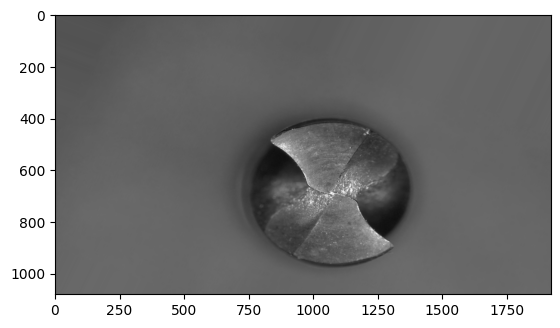

In [ ]:
plt.imshow(image_gen.random_transform(mtw_rgb))

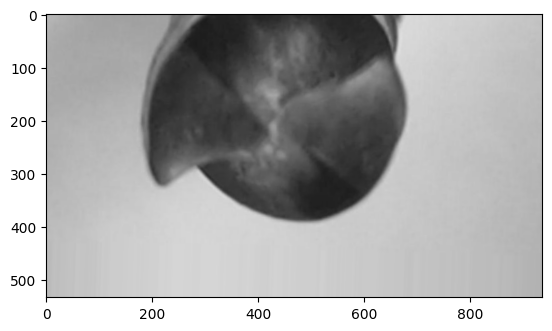

In [ ]:
plt.imshow(image_gen.random_transform(stw_rgb))

In [ ]:
image_gen.flow_from_directory('/content/drive/MyDrive/Milling_Tool_3_Classes')

Found 5493 images belonging to 2 classes.


In [ ]:
image_shape=(150,150,3)
image_shape[:2]

(150, 150)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(3))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
batch_size=20
train_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling_Tool_3_Classes/Train',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 3832 images belonging to 3 classes.


In [ ]:
batch_size=16
test_image_gen=image_gen.flow_from_directory('/content/drive/MyDrive/Milling_Tool_3_Classes/Test',
                                              target_size=image_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 1661 images belonging to 3 classes.


In [ ]:
train_image_gen.class_indices

{'Mild_Tool_Wear': 0, 'No_Tool_Wear': 1, 'Sever_Tool_Wear': 2}

In [ ]:
results=model.fit_generator(train_image_gen,epochs=20,
                            validation_data=test_image_gen)

<ipython-input-199-19126fe7afae>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results=model.fit_generator(train_image_gen,epochs=20,


Epoch 1/20
192/192 [==============================] - 223s 1s/step - loss: 0.9973 - accuracy: 0.5303 - val_loss: 2.1917 - val_accuracy: 0.4413
Epoch 2/20
192/192 [==============================] - 208s 1s/step - loss: 0.8799 - accuracy: 0.6250 - val_loss: 2.5965 - val_accuracy: 0.4467
Epoch 3/20
192/192 [==============================] - 207s 1s/step - loss: 0.8402 - accuracy: 0.6409 - val_loss: 3.1467 - val_accuracy: 0.4281
Epoch 4/20
192/192 [==============================] - 200s 1s/step - loss: 0.7598 - accuracy: 0.6712 - val_loss: 5.8527 - val_accuracy: 0.3967
Epoch 5/20
192/192 [==============================] - 200s 1s/step - loss: 0.6757 - accuracy: 0.7088 - val_loss: 4.4032 - val_accuracy: 0.4395
Epoch 6/20
192/192 [==============================] - 208s 1s/step - loss: 0.6520 - accuracy: 0.7189 - val_loss: 5.2746 - val_accuracy: 0.4389
Epoch 7/20
192/192 [==============================] - 206s 1s/step - loss: 0.6193 - accuracy: 0.7281 - val_loss: 4.5528 - val_accuracy: 0.4323

In [ ]:
accuracy=results.history['accuracy']
val_accuracy=results.history['val_accuracy']

loss=results.history['loss']
val_loss=results.history['val_loss']

Text(0, 0.5, 'Accuracy')

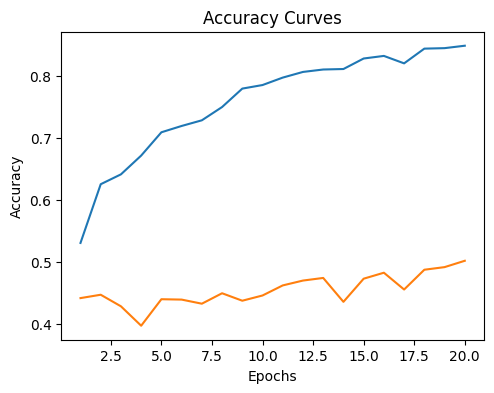

In [ ]:
trained_epochs=len(results.history['accuracy'])

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), accuracy, label='Training accuracy')
plt.plot(range(1, trained_epochs+1), val_accuracy, label='Validation accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

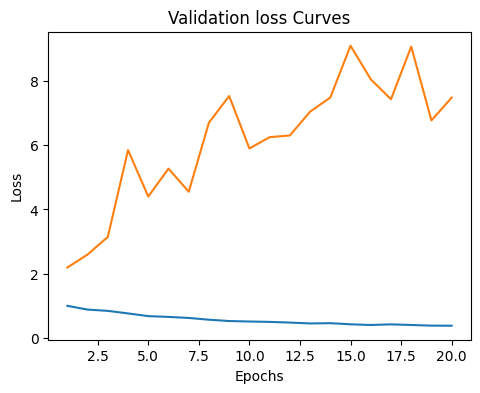

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1, trained_epochs+1), loss, label='Training loss')
plt.plot(range(1, trained_epochs+1), val_loss, label='Validation loss')
plt.title('Validation loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')